In [49]:
# Import dataset yang akan digunakan yaitu 'bbc-text.csv' (source: https://www.kaggle.com/balatmak/newsgroup20bbcnews?select=bbc-text.csv)

import pandas as pd
news_df = pd.read_csv('bbc-text.csv')
news_df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [50]:
# Menggunakan One Hot Encoding untuk memisahkan data kolom 'category'

category = pd.get_dummies(news_df['category'])
news_fixed = pd.concat([news_df, category], axis=1)
news_fixed = news_fixed.drop(columns='category')
news_fixed

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [58]:
# Menggunakan values function agar bisa diproses oleh model

text = news_fixed['text'].values
label = news_fixed[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [59]:
# Train test split data

from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

In [60]:
# Menggunakan text preprocessing tokenizer dan sequence preprocessing padsequences

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

train_sequences = tokenizer.texts_to_sequences(text_train)
test_sequences = tokenizer.texts_to_sequences(text_test)
 
train_padsequences = pad_sequences(train_sequences)
test_padsequences = pad_sequences(test_sequences)

In [94]:
# Menggunakan model sequential dengan menggunakan layers embedding, LSTM, dan Dense

import tensorflow
from tensorflow import keras
from tensorflow.keras import initializers

model = keras.Sequential([
                          keras.layers.Embedding(input_dim=5000, output_dim=16),
                          keras.layers.LSTM(64),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(5, activation='softmax')
])

In [95]:
# Compile model

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [96]:
# Tambahkan fungsi calbacks on_epoch_end

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi Model dan Validation telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [97]:
# Fit model

hist = model.fit(
    train_padsequences,
    label_train,
    epochs=30,
    validation_data=(test_padsequences, label_test),
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/30
56/56 - 28s - loss: 1.6039 - accuracy: 0.2326 - val_loss: 1.5934 - val_accuracy: 0.2180
Epoch 2/30
56/56 - 26s - loss: 1.6530 - accuracy: 0.2640 - val_loss: 1.5724 - val_accuracy: 0.3865
Epoch 3/30
56/56 - 26s - loss: 1.3517 - accuracy: 0.5208 - val_loss: 0.9598 - val_accuracy: 0.6404
Epoch 4/30
56/56 - 26s - loss: 0.7125 - accuracy: 0.7039 - val_loss: 0.6123 - val_accuracy: 0.7663
Epoch 5/30
56/56 - 26s - loss: 0.4148 - accuracy: 0.8360 - val_loss: 0.4550 - val_accuracy: 0.8315
Epoch 6/30
56/56 - 26s - loss: 0.2372 - accuracy: 0.9303 - val_loss: 0.4277 - val_accuracy: 0.8719
Epoch 7/30
56/56 - 26s - loss: 0.1521 - accuracy: 0.9573 - val_loss: 0.3970 - val_accuracy: 0.8944
Epoch 8/30
56/56 - 26s - loss: 0.0687 - accuracy: 0.9803 - val_loss: 0.4906 - val_accuracy: 0.8674
Epoch 9/30
56/56 - 26s - loss: 0.0288 - accuracy: 0.9949 - val_loss: 0.4507 - val_accuracy: 0.8921
Epoch 10/30
56/56 - 26s - loss: 0.0373 - accuracy: 0.9904 - val_loss: 0.5756 - val_accuracy: 0.8517
Epoch 11/

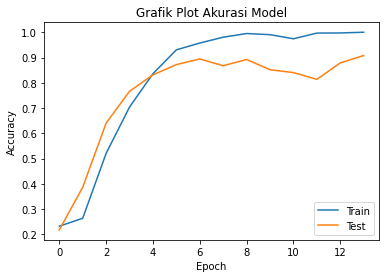

In [98]:
# Membuat grafik plot loss dan akurasi train test

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Grafik Plot Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

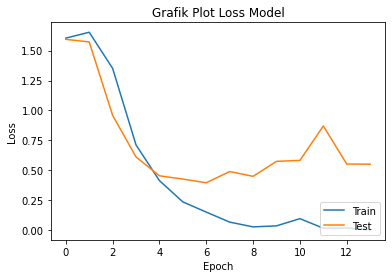

In [99]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Grafik Plot Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()